# Case Study on Correlation and Regression



FOLLOWING OPERATIONS ARE DONE ON THE DATASET.
A textile company regularly spent money on five advertising companies for their 
ads.
1. First of all, check whether there is any relationship between the amount 
spent for advertising through five different companies and profit 
generated.
2. Build a regression model to predict the profit from the given data and 
comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement.
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
data=pd.read_csv(r"D:\DSA\Add_sales_data_2018.csv")
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [12]:
data.isna().sum() #Checking for null values.

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [ ]:
#There is no null values present.

# 1.Relation between amount spent on ads and profit earned.

In [13]:
data.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

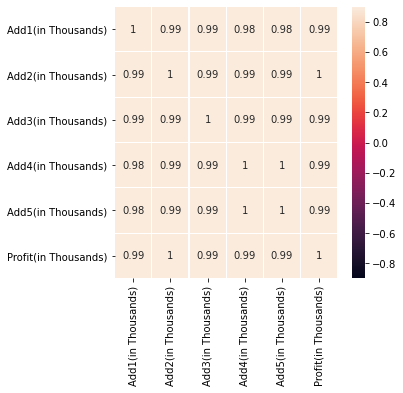

In [99]:
corrmatrix=data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corrmatrix,vmin=-0.9,vmax=0.9,annot=True,linewidths=0.1)

Insights: There is high positive correlation between amount spend on advertisement and profit earned. So the profit increases with the amount spend on ads.

# 2. Regression model to predict the profit

In [138]:
data1=data.drop(['Date'],axis=1)

<AxesSubplot:>

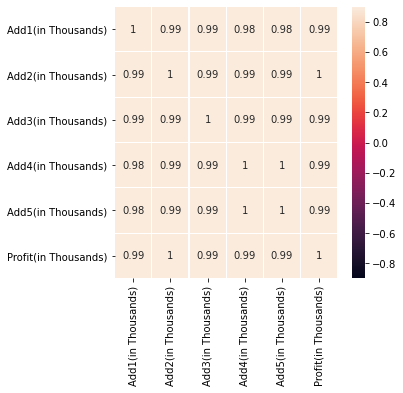

In [139]:
corrmatrix=data1.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corrmatrix,vmin=-0.9,vmax=0.9,annot=True,linewidths=0.1)

In [140]:
#Model creation
y=data1['Profit(in Thousands)']
x=data1.drop(['Profit(in Thousands)'],axis=1) #taking profit as target and other 5 ads as features.

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [142]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [143]:
model=lr.fit(x_train,y_train)

In [144]:
predictions=model.predict(x_test)

In [145]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predictions))

8.11273293080854e-25


In [149]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,predictions)
print(r2)

1.0


Comments: The model for predicting the profit is created and its R squared value of 1.0 indicates the model is perfect.

# 3. Predicting the profit.

In [146]:
make_pred=[[290,312,309,298,320]]
model.predict(make_pred).item()

5820.0599999999995

CONCLUSION:
If the company spend following amount for advertisement
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320
The profit generated will be 5820.0599999999995(in Thousands)